# CUB Dataset DataFrame Generation

Creates a pandas DataFrame from the CUB_200_2011 dataset for utilization in run notebook

In [1]:
import pandas as pd
import os

In [2]:
data_dir = '/media/data/cub/CUB_200_2011'

## Filenames

In [3]:
images = pd.read_csv(
    os.path.join( data_dir, 'images.txt' ),
    delimiter = ' ',
    header = None,
    names = [ 'index', 'filename' ],
    index_col = 'index',
)


In [4]:
images.head()

,filename
index,
1,001.Black_footed_Albatross/Black_Footed_Albatr...
2,001.Black_footed_Albatross/Black_Footed_Albatr...
3,001.Black_footed_Albatross/Black_Footed_Albatr...
4,001.Black_footed_Albatross/Black_Footed_Albatr...
5,001.Black_footed_Albatross/Black_Footed_Albatr...


### Parse out class

In [5]:
images['class'] = images['filename'].str.split('.').str[0].astype(int)

<Axes: >

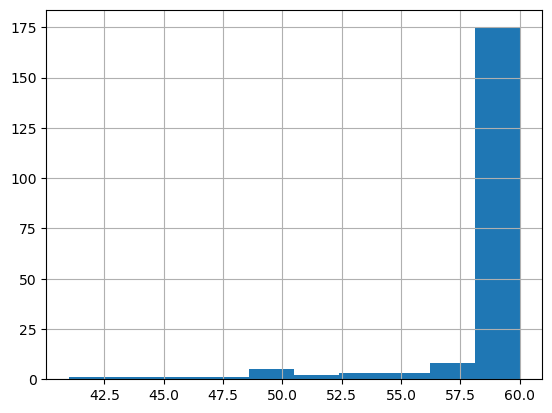

In [6]:
images['class'].value_counts().hist()

### Generate full file_path

In [7]:
images['file_path'] = images['filename'].apply( lambda filename: os.path.join( data_dir, 'images', filename) )

In [8]:
# assert each file exists
assert images['file_path'].apply( lambda file_path: os.path.isfile( file_path ) ).all()

## Class Names

In [9]:
classes = pd.read_csv(
    os.path.join( data_dir, 'classes.txt' ),
    delimiter = ' ',
    header = None,
    names = [ 'index', 'class' ],
    index_col = 'index',
)


In [10]:
classes.head()

,class
index,
1,001.Black_footed_Albatross
2,002.Laysan_Albatross
3,003.Sooty_Albatross
4,004.Groove_billed_Ani
5,005.Crested_Auklet


In [11]:
classes['split'] = classes['class'].str.split('.')

In [12]:
# just for sanity - make sure the index is the same as what is represented in the string
classes.index = classes['split'].str[0].astype(int).rename('index')

In [13]:
classes.head()

,class,split
index,,
1,001.Black_footed_Albatross,"[001, Black_footed_Albatross]"
2,002.Laysan_Albatross,"[002, Laysan_Albatross]"
3,003.Sooty_Albatross,"[003, Sooty_Albatross]"
4,004.Groove_billed_Ani,"[004, Groove_billed_Ani]"
5,005.Crested_Auklet,"[005, Crested_Auklet]"


In [14]:
classes['class'] = classes['split'].str[1].str.replace('_', ' ')
classes.head()

,class,split
index,,
1,Black footed Albatross,"[001, Black_footed_Albatross]"
2,Laysan Albatross,"[002, Laysan_Albatross]"
3,Sooty Albatross,"[003, Sooty_Albatross]"
4,Groove billed Ani,"[004, Groove_billed_Ani]"
5,Crested Auklet,"[005, Crested_Auklet]"


In [15]:
classes = classes.drop( 'split', axis = 1 )

In [16]:
classes

,class
index,
1,Black footed Albatross
2,Laysan Albatross
3,Sooty Albatross
4,Groove billed Ani
5,Crested Auklet
...,...
196,House Wren
197,Marsh Wren
198,Rock Wren


## Apply Class Names to Class Indexes

In [17]:
images['class_name'] = images['class'].map( classes['class'] )

In [18]:
images = images.drop( 'filename', axis = 1 )

In [19]:
images

,class,file_path,class_name
index,,,
1,1,/media/data/cub/CUB_200_2011/images/001.Black_...,Black footed Albatross
2,1,/media/data/cub/CUB_200_2011/images/001.Black_...,Black footed Albatross
3,1,/media/data/cub/CUB_200_2011/images/001.Black_...,Black footed Albatross
4,1,/media/data/cub/CUB_200_2011/images/001.Black_...,Black footed Albatross
5,1,/media/data/cub/CUB_200_2011/images/001.Black_...,Black footed Albatross
...,...,...,...
11784,200,/media/data/cub/CUB_200_2011/images/200.Common...,Common Yellowthroat
11785,200,/media/data/cub/CUB_200_2011/images/200.Common...,Common Yellowthroat
11786,200,/media/data/cub/CUB_200_2011/images/200.Common...,Common Yellowthroat


## Save HDF

In [20]:
images.to_hdf( os.path.join( data_dir, '..', 'cub.h5' ), 'cub' )